In [8]:
import pandas as pd
import numpy as np

In [9]:
data_elf = pd.read_csv(r'data\passages_export_ELF.csv')
data_mag = pd.read_csv(r'data\passages_export_MAG.csv')

In [10]:
data_elf.isnull().sum()

SampleID    0
Data_0      0
Data_1      0
Data_2      0
Data_3      0
           ..
Data_316    0
Data_317    0
Data_318    0
Data_319    0
Label       0
Length: 322, dtype: int64

In [11]:
data_mag.isnull().sum()

SampleID    0
Data_0      0
Data_1      0
Data_2      0
Data_3      0
           ..
Data_316    0
Data_317    0
Data_318    0
Data_319    0
Label       0
Length: 322, dtype: int64

In [12]:
data_elf.describe()

,SampleID,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,...,Data_311,Data_312,Data_313,Data_314,Data_315,Data_316,Data_317,Data_318,Data_319,Label
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,19.525386,25.523179,16.792494,18.582781,21.611479,42.328918,30.044150,150.682119,87.174393,...,46.311258,74.445916,-41.081678,44.450331,24.434879,-48.119205,49.905077,58.924945,15.717439,0.110375
std,130.914094,117.504876,190.170423,98.331371,123.180619,133.228060,439.797464,258.702716,2140.753886,1541.480055,...,796.152853,1395.288088,1218.011474,676.417185,362.364187,1337.801328,760.434152,999.011701,104.076765,0.313703
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-25856.000000,0.000000,0.000000,-28415.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,227.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,340.000000,5.000000,5.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.000000,5.000000,...,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
max,453.000000,2085.000000,3768.000000,1749.000000,2304.000000,2304.000000,7424.000000,4864.000000,32767.000000,32767.000000,...,16897.000000,29696.000000,1201.000000,14336.000000,7680.000000,1287.000000,16129.000000,21249.000000,1727.000000,1.000000


In [13]:
data_mag.describe()

,SampleID,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,...,Data_311,Data_312,Data_313,Data_314,Data_315,Data_316,Data_317,Data_318,Data_319,Label
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,...,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.00000,938.000000
mean,469.500000,-553.611940,-605.327292,-537.101279,-539.141791,-581.437100,-614.078891,-559.292111,-514.464819,-521.134328,...,-637.942431,-693.397655,-717.598081,-736.189765,-684.865672,-706.811301,-681.526652,-714.228145,-767.00533,0.069296
std,270.921575,1553.719205,1849.328922,1631.364732,1725.919324,1652.065229,1958.508732,1853.957798,1918.316982,1800.274168,...,2306.301537,1918.014046,2025.979064,2023.999609,2184.471226,2302.854649,2244.587791,2574.752856,2361.87261,0.254093
min,1.000000,-10620.000000,-25093.000000,-10560.000000,-10506.000000,-16392.000000,-31494.000000,-26119.000000,-10481.000000,-10439.000000,...,-24327.000000,-24170.000000,-28681.000000,-24066.000000,-24132.000000,-27399.000000,-29703.000000,-32245.000000,-32768.00000,0.000000
25%,235.250000,-1363.250000,-1415.250000,-1319.250000,-1424.750000,-1322.500000,-1293.750000,-1348.250000,-1276.750000,-1276.750000,...,-1460.250000,-1558.750000,-1467.500000,-1526.000000,-1528.000000,-1538.000000,-1479.250000,-1433.500000,-1548.50000,0.000000
50%,469.500000,-411.000000,-410.500000,-415.000000,-414.500000,-421.000000,-425.500000,-417.500000,-413.000000,-406.000000,...,-402.000000,-414.000000,-416.000000,-414.000000,-416.000000,-416.500000,-412.000000,-416.500000,-412.00000,0.000000
75%,703.750000,-256.000000,-265.500000,-267.500000,-261.500000,-265.250000,-271.500000,-273.000000,-256.250000,-248.250000,...,-236.500000,-248.000000,-267.250000,-264.000000,-251.250000,-279.750000,-241.750000,-247.250000,-259.50000,0.000000
max,938.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,...,30968.000000,15352.000000,7996.000000,7985.000000,31224.000000,28153.000000,30457.000000,31736.000000,7911.00000,1.000000


In [14]:
data_elf['Label'].value_counts()


Label
0    403
1     50
Name: count, dtype: int64

In [15]:
data_mag['Label'].value_counts()


Label
0    873
1     65
Name: count, dtype: int64

In [16]:
len(data_elf), len(data_mag)

(453, 938)

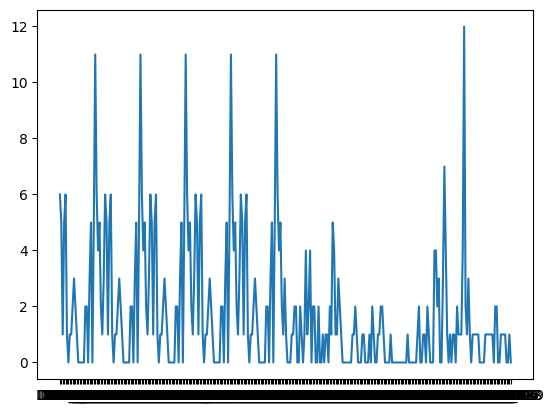

In [17]:
import matplotlib.pyplot as plt
plt.plot(data_elf.iloc[0, 1:321])  # Toma una fila y grafica las primeras 320 columnas
plt.show()


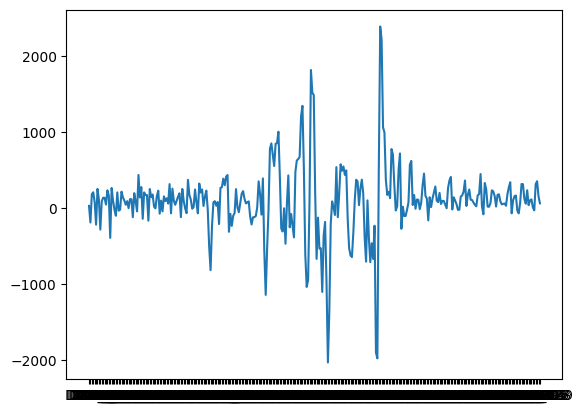

In [18]:
import matplotlib.pyplot as plt
plt.plot(data_mag.iloc[0, 1:321])  # Toma una fila y grafica las primeras 320 columnas
plt.show()
